In [1]:
#Importar glob para buscar os nomes dos arquivos
import pandas as pd
from glob import glob
import datetime
import matplotlib.pyplot as plt

In [2]:
#Buscando os nome de todos arquivos
arquivos = sorted(glob('Dados/ANATEL/Solicitacoes/Solicitações Registradas na Anatel *.csv'))
arquivos

['Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AC).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AL).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AM).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-AP).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-BA).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-CE).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-DF).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-ES).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-GO).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-MA).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-MG).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitações Registradas na Anatel (2006-MS).csv',
 'Dados/ANATEL/Solicitacoes\\Solicitaçõe

In [3]:
#Importando
df = pd.concat((pd.read_csv(file, sep=';', encoding='iso-8859-1').assign(filename=file) for file in arquivos), ignore_index = True)

In [4]:
df.head()

,DataExtracao,Ano,Mes,CanalEntrada,Condicao,GrupoEconNorm,Tipo,Servico,Modalidade,Motivo,UF,QtdeSolic,filename
0,2016-04-28,2006,1,Atendimento Pessoal,Nova,CLARO,Reclamação,Móvel Pessoal,Pós-Pago,Completamento de Chamadas,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...
1,2016-04-28,2006,1,Call Center,Nova,Anatel,Pedido de Informação,Serviços da Anatel,Cópia de Documentos,Solicitação (ID),AC,4,Dados/ANATEL/Solicitacoes\Solicitações Registr...
2,2016-04-28,2006,1,Call Center,Nova,CLARO,Reclamação,Móvel Pessoal,Pós-Pago,Reparo,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...
3,2016-04-28,2006,1,Call Center,Nova,OI,Reclamação,Móvel Pessoal,Pós-Pago,Cancelamento,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...
4,2016-04-28,2006,1,Call Center,Nova,OI,Reclamação,Móvel Pessoal,Pós-Pago,Cobrança,AC,1,Dados/ANATEL/Solicitacoes\Solicitações Registr...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164306 entries, 0 to 5164305
Data columns (total 13 columns):
DataExtracao     object
Ano              int64
Mes              int64
CanalEntrada     object
Condicao         object
GrupoEconNorm    object
Tipo             object
Servico          object
Modalidade       object
Motivo           object
UF               object
QtdeSolic        int64
filename         object
dtypes: int64(3), object(10)
memory usage: 512.2+ MB


In [6]:
df.describe()

,Ano,Mes,QtdeSolic
count,5.164306e+06,5.164306e+06,5.164306e+06
mean,2.014793e+03,6.334500e+00,6.444824e+00
std,3.449559e+00,3.383032e+00,4.564259e+01
min,2.006000e+03,1.000000e+00,1.000000e+00
25%,2.013000e+03,3.000000e+00,1.000000e+00
50%,2.016000e+03,6.000000e+00,1.000000e+00
75%,2.017000e+03,9.000000e+00,3.000000e+00
max,2.019000e+03,1.200000e+01,1.342200e+04


In [7]:
df.columns

Index(['DataExtracao', 'Ano', 'Mes', 'CanalEntrada', 'Condicao',
       'GrupoEconNorm', 'Tipo', 'Servico', 'Modalidade', 'Motivo', 'UF',
       'QtdeSolic', 'filename'],
      dtype='object')

In [8]:
# Criando coluna Data em datetime

df['Data'] = pd.to_datetime(df.Ano.astype(str) + '-' + df.Mes.astype(str))
df.Data

0         2006-01-01
1         2006-01-01
2         2006-01-01
3         2006-01-01
4         2006-01-01
             ...    
5164301   2019-09-01
5164302   2019-09-01
5164303   2019-09-01
5164304   2019-09-01
5164305   2019-09-01
Name: Data, Length: 5164306, dtype: datetime64[ns]

# Visualizando os dados

In [9]:
#Visualizando os valores unicos de cada coluna

for col in df.columns:
    print(col, len(df[col].unique()))
    
# A coluna Motivo possui muitos valores unicos, dificultando a analise

DataExtracao 7
Ano 14
Mes 12
CanalEntrada 11
Condicao 3
GrupoEconNorm 22
Tipo 5
Servico 19
Modalidade 71
Motivo 383
UF 28
QtdeSolic 1969
filename 392
Data 165


In [10]:
df.QtdeSolic.sum()

# 33 milhões de solicitações no total

33283043

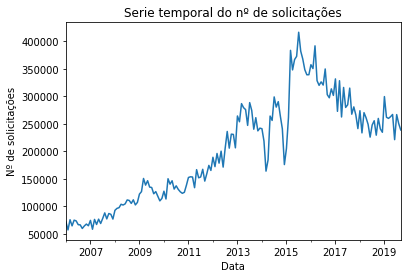

In [11]:
df.groupby(by='Data').sum()['QtdeSolic'].plot()
plt.title('Serie temporal do nº de solicitações')
plt.ylabel('Nº de solicitações')
plt.show()

(0, 3061140.3)

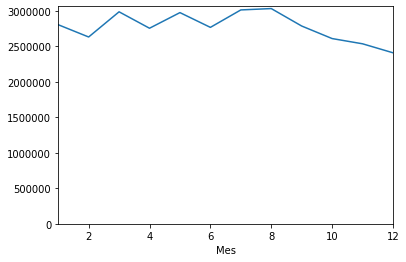

In [55]:
f, ax = plt.subplots(1)
df.groupby(by='Mes').sum()['QtdeSolic'].plot()
ax.set_ylim(bottom=0)

In [13]:
# Definindo funções

def groupby_sum(df, column):
    return df.groupby(by=column).sum()['QtdeSolic'].sort_values(ascending=False)

def plot_st(df, column, sub_str_title, top_int):
    " Função filtra o data frame passado para apenas os valores que lideram a lista gerada pelo 'groupby_sum'. Em seguida ela plota a série temporal."
    df_x = df[df[column].isin(groupby_sum(df, column).index[:top_int])]
    df_x.groupby(by=['Data', column]).sum()['QtdeSolic'].unstack().plot()
    plt.title('Nº de solicitações por ' + sub_str_title)
    plt.ylabel('Nº de solicitações')
    return plt.show()

In [14]:
# Solicitações por estado

groupby_sum(df, 'UF')

UF
SP    10301620
RJ     5650112
MG     4317064
BA     2062285
RS     1677423
PR     1578862
GO     1041964
PE      945123
SC      900530
CE      758015
DF      734244
ES      516919
PA      412320
ND      289181
MA      257007
MS      248649
SE      247310
PB      230709
MT      227071
RN      211567
AM      198106
PI      138132
AL      135548
RO       79521
TO       64877
AC       21528
AP       19312
RR       18044
Name: QtdeSolic, dtype: int64

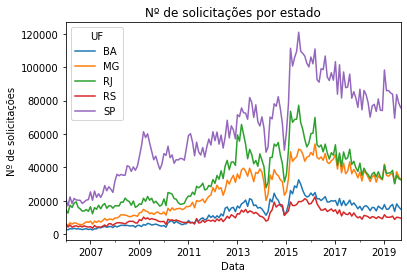

In [15]:
#pd.pivot_table(data = df, index='Data', columns = 'UF', values = 'QtdeSolic')

plot_st(df, 'UF', 'estado', 5)

In [16]:
groupby_sum(df, 'Ano')

Ano
2015    4132967
2016    3962027
2017    3447450
2013    3151671
2018    2982349
2014    2879816
2012    2423681
2019    2329147
2011    1876891
2010    1590193
2009    1545043
2008    1244990
2007     912095
2006     804723
Name: QtdeSolic, dtype: int64

In [17]:
# Total solicitações por empresa

groupby_sum(df, 'GrupoEconNorm')


GrupoEconNorm
OI                   10377166
VIVO                  7717324
TIM                   4949328
CLARO                 4019383
NET                   2732539
SKY                   1262434
NEXTEL                 622231
Anatel                 530032
Outros                 504807
GVT                    373670
ALGAR                  128814
EMBRATEL                26625
SERCOMTEL               14250
BLUE                    12734
HUGHES NET               3678
Intelig                  2989
Correios Celular         1697
Brisanet                 1208
CABO TELECOM              685
NOSSA TV - BRASIL         107
Datora                     50
Name: QtdeSolic, dtype: int64

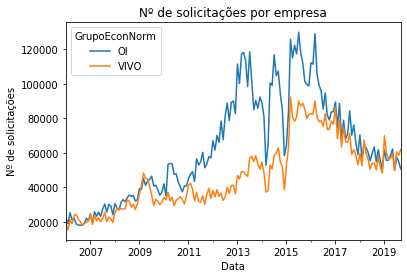

In [39]:
plot_st(df, 'GrupoEconNorm', 'empresa', 2)

In [19]:
# solicitacoes por servicos das solicitacoes

groupby_sum(df, 'Servico')
#df.groupby(by='Servico').sum()['QtdeSolic'].sort_values(ascending=False)


Servico
Móvel Pessoal                                              7368157
Serviço Telefônico Fixo Comutado - STFC                    5346385
Celular Pós-Pago                                           5319963
Telefone Fixo                                              3872570
TV por Assinatura                                          3334646
Banda Larga Fixa                                           2754535
Celular Pré-Pago                                           2369556
Serviço de Comunicação Multimídia                          2203512
Serviços da Anatel                                          391174
Troncalizado (Trunking)                                     114471
Radiodifusão (Rádio e TV)                                    84906
Serviço de Rede e Transporte de Telecomunicações - SRTT      36074
Radioamador (PY)                                             27089
Outros                                                       26516
Rádio do Cidadão (PX)                                 

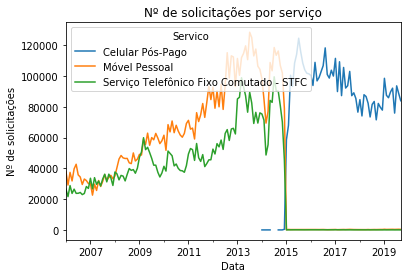

In [41]:
plot_st(df, 'Servico', 'serviço', 3)

In [21]:
# Modalidades das solicitacoes

groupby_sum(df, 'Modalidade')

# Valores muito difusos

Modalidade
Cobrança                                                   5609966
Pós-Pago                                                   5307431
Local                                                      5194808
Qualidade, Funcionamento e Reparo                          2383505
Banda larga - ADSL                                         2076722
                                                            ...   
Regulamentação                                                  54
Fiscalização                                                    31
Universalização                                                 23
Soluções de Competição                                          19
Demandas de Órgãos e Entidades Relativas a Consumidores          4
Name: QtdeSolic, Length: 71, dtype: int64

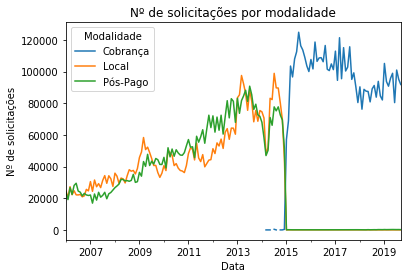

In [42]:
plot_st(df, 'Modalidade', 'modalidade', 3)

# Reclamacoes sao 94% dos tipos de solicitacoes

In [23]:
# Motivo das solicitacoes

groupby_sum(df, 'Motivo')

#df_motivo = df.groupby(by='Motivo').sum()['QtdeSolic'].sort_values(ascending=False)

#df.Motivo.value_counts(normalize=True, dropna=False).head(10)

Motivo
Cobrança                                              5166981
Reparo                                                2963236
Cobrança em desacordo com o contratado                2017499
Atendimento                                           1261893
Cancelamento                                           976983
                                                       ...   
LDN/LDI - Cobrança após cancelamento do plano               1
SCM - Banda Larga                                           1
RGQ - Regulamento de Gestão de Qualidade                    1
LDN/LDI - Cobrança de ligações com valor incorreto          1
LDN/LDI - Não consegue aderir à promoção                    1
Name: QtdeSolic, Length: 383, dtype: int64

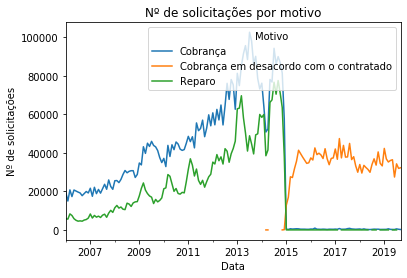

In [45]:
plot_st(df, 'Motivo', 'motivo', 3)

In [59]:
groupby_sum(df, 'CanalEntrada')

CanalEntrada
Call Center             24123975
Fale Conosco             7658861
Aplicativo Móvel         1236268
Atendimento Pessoal       172589
Correspondência            59046
SIC                        10116
Fax                         9935
SOA                         6681
E-mail                      5090
TTS                          451
Não Informado                 31
Name: QtdeSolic, dtype: int64

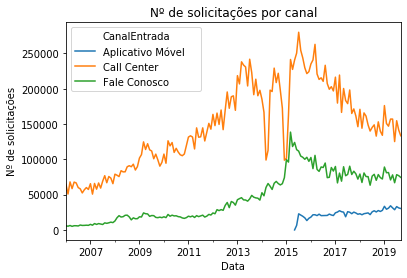

In [58]:
plot_st(df, 'CanalEntrada', 'canal', 3)

In [31]:
reclamacao_ano = tipos_ano_df[tipos_ano_df.Tipo == 'Reclamação']
type(reclamacao_ano)

pandas.core.frame.DataFrame

In [32]:
reclamacao_ano.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019],
           dtype='int64', name='Ano')

In [33]:
tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação']

,Tipo,Contagem
Ano,,
2006,Pedido de Informação,0.141180
2007,Pedido de Informação,0.144426
2008,Pedido de Informação,0.135143
2009,Pedido de Informação,0.104773
2010,Pedido de Informação,0.094111
2011,Pedido de Informação,0.093688
2012,Pedido de Informação,0.081206
2013,Pedido de Informação,0.064525
2014,Pedido de Informação,0.036174


In [34]:
print('Fatia de Reclamacoes no total de tipo de solicitacoes')
print("\n")
print('2006 ', reclamacao_ano.loc[2006, 'Contagem'], ' ou ', (reclamacao_ano.loc[2006, 'Contagem']*100), '% do total')
print('2019 ', reclamacao_ano.loc[2019, 'Contagem'], ' ou ', (reclamacao_ano.loc[2019, 'Contagem']*100), '% do total')
print("\n")
print('Variacao total e de ', reclamacao_ano.loc[2019, 'Contagem'] - reclamacao_ano.loc[2006, 'Contagem'], \
     ' ou ', (reclamacao_ano.loc[2019, 'Contagem'] - reclamacao_ano.loc[2006, 'Contagem'])*100, '% do total')

Fatia de Reclamacoes no total de tipo de solicitacoes


2006  0.8035454103933949  ou  80.3545410393395 % do total
2019  0.979333946655489  ou  97.9333946655489 % do total


Variacao total e de  0.17578853626209412  ou  17.578853626209412 % do total


In [35]:
ped_info_ano = tipos_ano_df[tipos_ano_df.Tipo == 'Pedido de Informação']
print('Fatia de Pedido de Informação no total de tipo de solicitacoes')
print("\n")
print('2006 ', ped_info_ano.loc[2006, 'Contagem'], ' ou ', (ped_info_ano.loc[2006, 'Contagem']*100), '% do total')
print('2019 ', ped_info_ano.loc[2019, 'Contagem'], ' ou ', (ped_info_ano.loc[2019, 'Contagem']*100), '% do total')
print("\n")
print('Variacao total e de ', ped_info_ano.loc[2019, 'Contagem'] - ped_info_ano.loc[2006, 'Contagem'], \
     ' ou ', (ped_info_ano.loc[2019, 'Contagem'] - ped_info_ano.loc[2006, 'Contagem'])*100, '% do total')

Fatia de Pedido de Informação no total de tipo de solicitacoes


2006  0.14118001708227965  ou  14.118001708227965 % do total
2019  0.01713672910576541  ou  1.713672910576541 % do total


Variacao total e de  -0.12404328797651423  ou  -12.404328797651424 % do total


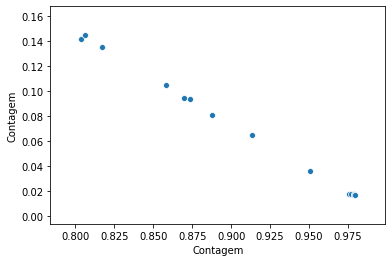

In [36]:
import seaborn as sns
sns.scatterplot(reclamacao_ano.Contagem, ped_info_ano.Contagem)


In [37]:
import numpy as np
r = np.corrcoef(reclamacao_ano.Contagem, ped_info_ano.Contagem)
r[1,0]

-0.9996409123526779

In [38]:
r = np.corrcoef(reclamacao_ano.Contagem, tipos_ano_df[tipos_ano_df.Tipo == 'Denúncia'].Contagem)
r[1,0]

-0.9931157621508678

Analisando os tipos de solicitacoes, vemos que em 2006, o tipo "Reclamacao" representava 80% do total de solicitacoes e em 2019 passou a representar quase a totalidade das solicitacoes feitas, 98%.

Essa analise foi feita apenas com numeros relativos, nao e possivel saber se o numero de reclamacoes subiu ou se os outros tipos cairam.